In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import scipy
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, ElasticNetCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

import matplotlib
import plotly.express as px
import plotly.graph_objects as go

# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [27]:
df= pd.read_csv('../01.Data_Collection/screens_final_with_group4_frate.csv')
frate=pd.read_csv('../01.Data_Collection/films_final.csv')

테이블 및 컬럼 정리

In [28]:
frate =frate[['영화명','장르','배급사','감독1성별','작가성별','배우성별']]

In [29]:
frate.head(1)

,영화명,장르,배급사,감독1성별,작가성별,배우성별
0,워킹걸,"코미디,멜로/로맨스",메가박스중앙(주)플러스엠,남자,남자,여자


In [19]:
frate['영화명'].nunique()

662

In [30]:
df=df[['영화명', '개봉일', '점유율집계일','개봉n일차(int)','상영횟수','스크린수','좌석수','좌석판매율','매출액', '누적매출액', '관객수','누적관객수','F-rated']]

In [31]:
df['영화명'].nunique()

38

In [74]:
df['배급사'].unique()

array(['(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '(주)와우픽쳐스', '씨제이이앤엠(주)',
       '롯데컬처웍스(주)롯데엔터테인먼트', '오퍼스픽쳐스(유),CGV아트하우스', '메가박스중앙(주)플러스엠',
       '롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스', '씨네그루(주)키다리이엔티', '워너브러더스 코리아(주)',
       '(주)메리크리스마스,TCO(주)더콘텐츠온', '(주)에이스메이커무비웍스', 'CGV아트하우스'],
      dtype=object)

In [18]:
df.head(1)

,영화명,개봉일,점유율집계일,개봉n일차(int),상영횟수,스크린수,좌석수,좌석판매율,매출액,누적매출액,관객수,F-rated,F등급
0,조선명탐정 : 사라진 놉의 딸,2015-02-11,2015-02-02,-9,4,4,869,100.000000,6083000,6083000,869,1,1


In [26]:
df['장르'].nunique()

21

In [32]:
df=df.merge(frate, on='영화명', how='inner')

In [35]:
df.tail()

,영화명,개봉일,점유율집계일,개봉n일차(int),상영횟수,스크린수,좌석수,좌석판매율,매출액,누적매출액,관객수,누적관객수,F-rated,장르,배급사,감독1성별,작가성별,배우성별,F등급
2934,유열의 음악앨범,2019-08-28,2019-10-11,44,3,3,300,11.700000,251000,10232472040,35,1245407,2,"멜로/로맨스,드라마",CGV아트하우스,남자,여자,여자,2
2935,유열의 음악앨범,2019-08-28,2019-10-12,45,3,3,300,13.000000,294000,10232766040,39,1245446,2,"멜로/로맨스,드라마",CGV아트하우스,남자,여자,여자,2
2936,유열의 음악앨범,2019-08-28,2019-10-13,46,3,3,300,10.000000,210000,10232976040,30,1245476,2,"멜로/로맨스,드라마",CGV아트하우스,남자,여자,여자,2
2937,유열의 음악앨범,2019-08-28,2019-10-14,47,3,3,372,9.700000,263000,10233239040,36,1245512,2,"멜로/로맨스,드라마",CGV아트하우스,남자,여자,여자,2
2938,유열의 음악앨범,2019-08-28,2019-10-20,53,1,1,8,100.000000,96000,10233335040,8,1245520,2,"멜로/로맨스,드라마",CGV아트하우스,남자,여자,여자,2


In [36]:
df.to_csv('../01.Data_Collection/screens_frate_for_group4_regression.csv')

In [34]:
df['F등급']=df['F-rated']

In [43]:
df.groupby('개봉n일차(int)').count()
#28일차 까지는 모든 정보가 있으니 28일까지 활용가능

,영화명,개봉일,점유율집계일,상영횟수,스크린수,좌석수,좌석판매율,매출액,누적매출액,관객수,누적관객수,F-rated,장르,배급사,감독1성별,작가성별,배우성별,F등급
개봉n일차(int),,,,,,,,,,,,,,,,,,
-77,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-55,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-44,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-43,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-42,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
-41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-40,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-39,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-29,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


28일까지만 넣어 보기

In [61]:
a=list(range(29))

In [67]:
released_28th =df[df['개봉n일차(int)'].isin(a)]

## 참여자 성별에 따른 관계들
statsmodels를 이용한 선형 모형

In [46]:
res= ols('좌석판매율 ~ C(감독1성별)+C(작가성별)+C(배우성별)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.477
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           5.52e-05
Time:                        16:43:25   Log-Likelihood:                -14360.
No. Observations:                2939   AIC:                         2.873e+04
Df Residuals:                    2935   BIC:                         2.875e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         28.9429      0.738     39.208      0.000      27.496      30.390
C(감독1성별)[T.여자]     7.2299      2.097      3.447      0.001       3.118      11.342
C(작가성별)[T.여자]      2.8629      1.467      1.952      0.051      -0.013       5.739
C(배우성별)[T.여자]      0.6533      1.405      0.465      0.642      -2.101       3.408
==============================================================================
Omnibus:                      479.501   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.570
Skew:                           1.239   Prob(JB):                    1.40e-164
Kurtosis:                       3.131   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
res= ols('관객수 ~ C(감독1성별)+C(작가성별)+C(배우성별)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    관객수   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.791
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           0.000606
Time:                        16:48:56   Log-Likelihood:                -37657.
No. Observations:                2939   AIC:                         7.532e+04
Df Residuals:                    2935   BIC:                         7.535e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        4.26e+04   2044.943     20.829      0.000    3.86e+04    4.66e+04
C(감독1성별)[T.여자] -1.923e+04   5809.830     -3.309      0.001   -3.06e+04   -7835.384
C(작가성별)[T.여자]  -1759.9434   4062.826     -0.433      0.665   -9726.220    6206.333
C(배우성별)[T.여자]  -6356.6165   3891.428     -1.633      0.102    -1.4e+04    1273.589
==============================================================================
Omnibus:                     2468.325   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66676.287
Skew:                           3.937   Prob(JB):                         0.00
Kurtosis:                      24.965   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
res= ols('매출액 ~ C(감독1성별)+C(작가성별)+C(배우성별)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.462
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           0.000964
Time:                        16:48:37   Log-Likelihood:                -64122.
No. Observations:                2939   AIC:                         1.283e+05
Df Residuals:                    2935   BIC:                         1.283e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.42e+08   1.67e+07     20.542      0.000    3.09e+08    3.75e+08
C(감독1성별)[T.여자] -1.508e+08   4.73e+07     -3.187      0.001   -2.44e+08    -5.8e+07
C(작가성별)[T.여자]  -1.277e+07   3.31e+07     -0.386      0.700   -7.76e+07    5.21e+07
C(배우성별)[T.여자]  -5.267e+07   3.17e+07     -1.662      0.097   -1.15e+08    9.46e+06
==============================================================================
Omnibus:                     2441.081   Durbin-Watson:                   0.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60929.464
Skew:                           3.905   Prob(JB):                         0.00
Kurtosis:                      23.894   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
res= ols('좌석수 ~ C(감독1성별)+C(작가성별)+C(배우성별)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    좌석수   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.969
Date:                Sun, 08 Dec 2019   Prob (F-statistic):            0.00778
Time:                        16:48:50   Log-Likelihood:                -41177.
No. Observations:                2939   AIC:                         8.236e+04
Df Residuals:                    2935   BIC:                         8.239e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.849e+05   6774.205     27.302      0.000    1.72e+05    1.98e+05
C(감독1성별)[T.여자]   -4.3e+04   1.92e+04     -2.234      0.026   -8.07e+04   -5263.436
C(작가성별)[T.여자]   5868.6143   1.35e+04      0.436      0.663   -2.05e+04    3.23e+04
C(배우성별)[T.여자]   -3.12e+04   1.29e+04     -2.420      0.016   -5.65e+04   -5922.830
==============================================================================
Omnibus:                     1042.868   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3111.407
Skew:                           1.864   Prob(JB):                         0.00
Kurtosis:                       6.392   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
res= ols('좌석판매율 ~ F등급', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     15.83
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           7.10e-05
Time:                        16:42:27   Log-Likelihood:                -14364.
No. Observations:                2939   AIC:                         2.873e+04
Df Residuals:                    2937   BIC:                         2.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7591      0.735     39.119      0.000      27.318      30.201
F등급            2.9497      0.741      3.979      0.000       1.496       4.403
==============================================================================
Omnibus:                      486.354   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.803
Skew:                           1.252   Prob(JB):                    6.91e-168
Kurtosis:                       3.143   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
res= ols('좌석판매율 ~ C(배급사)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     8.413
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           7.22e-16
Time:                        20:10:26   Log-Likelihood:                -14322.
No. Observations:                2939   AIC:                         2.867e+04
Df Residuals:                    2926   BIC:                         2.875e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            28.8342      1.433     20.115      0.000      26.023      31.645
C(배급사)[T.(주)메리크리스마스,TCO(주)더콘텐츠온]     14.0931      3.886      3.626      0.000       6.473      21.713
C(배급사)[T.(주)쇼박스]                     -5.1484      2.260     -2.278      0.023      -9.580      -0.717
C(배급사)[T.(주)에이스메이커무비웍스]              -2.9101      4.546     -0.640      0.522     -11.823       6.003
C(배급사)[T.(주)와우픽쳐스]                   -0.8387      3.333     -0.252      0.801      -7.373       5.696
C(배급사)[T.CGV아트하우스]                   -3.6429      4.437     -0.821      0.412     -12.342       5.056
C(배급사)[T.롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스]    18.8935      3.128      6.040      0.000      12.760      25.027
C(배급사)[T.롯데컬처웍스(주)롯데엔터테인먼트]           6.1020      2.079      2.935      0.003       2.025      10.179
C(배급사)[T.메가박스중앙(주)플러스엠]               1.6726      2.700      0.620      0.536      -3.621       6.966
C(배급사)[T.씨네그루(주)키다리이엔티]             -16.6825      4.336     -3.847      0.000     -25.184      -8.180
C(배급사)[T.씨제이이앤엠(주)]                   2.0078      1.795      1.119      0.263      -1.511       5.527
C(배급사)[T.오퍼스픽쳐스(유),CGV아트하우스]         -1.2013      4.051     -0.297      0.767      -9.144       6.741
C(배급사)[T.워너브러더스 코리아(주)]              -2.8172      4.185     -0.673      0.501     -11.023       5.388
==============================================================================
Omnibus:                      491.680   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              777.515
Skew:                           1.253   Prob(JB):                    1.46e-169
Kurtosis:                       3.258   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# sample = pd.read_csv('../01.Data_Collection/films_final_weekly_audi_merged.csv')

In [76]:
res= ols('좌석판매율 ~ C(감독1성별)*C(작가성별)*C(배우성별)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.984
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           1.74e-07
Time:                        20:22:26   Log-Likelihood:                -14352.
No. Observations:                2939   AIC:                         2.872e+04
Df Residuals:                    2933   BIC:                         2.875e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     29.4634      0.756     38.994      0.000      27.982      30.945
C(감독1성별)[T.여자]                                 6.6223      1.589      4.169      0.000       3.507       9.737
C(작가성별)[T.여자]                                 -3.8136      2.187     -1.744      0.081      -8.101       0.474
C(배우성별)[T.여자]                                 -1.0108      1.933     -0.523      0.601      -4.802       2.780
C(감독1성별)[T.여자]:C(작가성별)[T.여자]                  10.0384      2.431      4.129      0.000       5.272      14.805
C(감독1성별)[T.여자]:C(배우성별)[T.여자]                  -3.4162      2.590     -1.319      0.187      -8.494       1.662
C(작가성별)[T.여자]:C(배우성별)[T.여자]                   10.9290      3.370      3.243      0.001       4.321      17.537
C(감독1성별)[T.여자]:C(작가성별)[T.여자]:C(배우성별)[T.여자]          0          0        nan        nan           0           0
==============================================================================
Omnibus:                      478.961   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              752.659
Skew:                           1.237   Prob(JB):                    3.65e-164
Kurtosis:                       3.151   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 1209

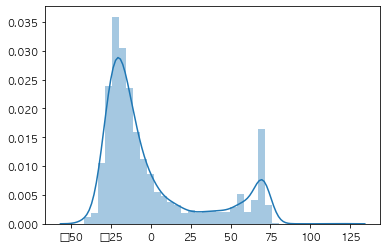

In [128]:
sns.distplot(res.resid) #res의 잔차 보기!

In [123]:
df.columns

Index(['영화명', '개봉일', '점유율집계일', '개봉n일차(int)', '상영횟수', '스크린수', '좌석수', '좌석판매율',
       '매출액', '누적매출액', '관객수', '누적관객수', 'F-rated', '장르', '배급사', '감독1성별', '작가성별',
       '배우성별', 'F등급', 'day', 'weekdays'],
      dtype='object')

In [160]:
df.head()

,영화명,개봉일,점유율집계일,개봉n일차(int),상영횟수,스크린수,좌석수,좌석판매율,매출액,누적매출액,관객수,누적관객수,F-rated,장르,배급사,감독1성별,작가성별,배우성별,F등급,day,weekdays
0,조선명탐정 : 사라진 놉의 딸,2015-02-11,2015-02-02,-9,4,4,869,100.000000,6083000,6083000,869,869,1,"사극,코미디,어드벤처",(주)쇼박스,남자,여자,남자,1,0,1
1,조선명탐정 : 사라진 놉의 딸,2015-02-11,2015-02-03,-8,9,9,2025,100.000000,18225000,24308000,2025,2894,1,"사극,코미디,어드벤처",(주)쇼박스,남자,여자,남자,1,1,1
2,조선명탐정 : 사라진 놉의 딸,2015-02-11,2015-02-04,-7,14,14,2972,97.400000,23160000,47468000,2895,5789,1,"사극,코미디,어드벤처",(주)쇼박스,남자,여자,남자,1,2,1
3,조선명탐정 : 사라진 놉의 딸,2015-02-11,2015-02-05,-6,7,7,2425,99.500000,16891000,64359000,2413,8202,1,"사극,코미디,어드벤처",(주)쇼박스,남자,여자,남자,1,3,1
4,조선명탐정 : 사라진 놉의 딸,2015-02-11,2015-02-11,0,3670,740,762037,14.900000,853823300,918182300,113443,121645,1,"사극,코미디,어드벤처",(주)쇼박스,남자,여자,남자,1,2,1


## 선형모형 적용

In [155]:
x= df.loc[:, ['F등급','스크린수','관객수']] #1번열부터 6번열까지가 x
y= df['좌석판매율']

In [156]:
m1=LinearRegression()
m1.fit(x,y)

m1.coef_ 
# 여기서 더미코딩 적용하는 법 모르겠음

array([ 2.89582053e+00, -4.79324363e-02,  1.61697380e-04])

In [158]:
m2 =ElasticNetCV(l1_ratio=[.1,.5,1], cv=3) # 3fold cv(데이터셋을 세개로 나누삼), 후보를 세개 .1.5,1로 정한것
m2.fit(x,y)
m2.coef_ # 위의 것과 이것을 비교하면, 여기애들이 계수가 다 작죠 
# 이 식안에 람다는 100건 들어가 있어요

array([ 0.        , -0.04591698,  0.00015349])

In [159]:
m2.l1_ratio_

0.1

배급사 ~ 흥행 관계 보기

In [140]:
dstrb = df.set_index('배급사')

In [142]:
dstrb= dstrb.drop(['(주)에이스메이커무비웍스','(주)와우픽쳐스','CGV아트하우스','메가박스중앙(주)플러스엠','씨제이이앤엠(주)','오퍼스픽쳐스(유),CGV아트하우스','워너브러더스 코리아(주)'])

In [144]:
dstrb =dstrb.reset_index()

In [147]:
df.groupby('배급사').count()

,영화명,개봉일,점유율집계일,개봉n일차(int),상영횟수,스크린수,좌석수,좌석판매율,매출액,누적매출액,관객수,누적관객수,F-rated,장르,감독1성별,작가성별,배우성별,F등급,day,weekdays
배급사,,,,,,,,,,,,,,,,,,,,
(주)넥스트엔터테인먼트월드(NEW),489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489
"(주)메리크리스마스,TCO(주)더콘텐츠온",77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
(주)쇼박스,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329
(주)에이스메이커무비웍스,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
(주)와우픽쳐스,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111
CGV아트하우스,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
"롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스",130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
롯데컬처웍스(주)롯데엔터테인먼트,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443
메가박스중앙(주)플러스엠,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192


In [75]:
res= ols('좌석판매율 ~ C(배급사)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     8.413
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           7.22e-16
Time:                        20:10:26   Log-Likelihood:                -14322.
No. Observations:                2939   AIC:                         2.867e+04
Df Residuals:                    2926   BIC:                         2.875e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            28.8342      1.433     20.115      0.000      26.023      31.645
C(배급사)[T.(주)메리크리스마스,TCO(주)더콘텐츠온]     14.0931      3.886      3.626      0.000       6.473      21.713
C(배급사)[T.(주)쇼박스]                     -5.1484      2.260     -2.278      0.023      -9.580      -0.717
C(배급사)[T.(주)에이스메이커무비웍스]              -2.9101      4.546     -0.640      0.522     -11.823       6.003
C(배급사)[T.(주)와우픽쳐스]                   -0.8387      3.333     -0.252      0.801      -7.373       5.696
C(배급사)[T.CGV아트하우스]                   -3.6429      4.437     -0.821      0.412     -12.342       5.056
C(배급사)[T.롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스]    18.8935      3.128      6.040      0.000      12.760      25.027
C(배급사)[T.롯데컬처웍스(주)롯데엔터테인먼트]           6.1020      2.079      2.935      0.003       2.025      10.179
C(배급사)[T.메가박스중앙(주)플러스엠]               1.6726      2.700      0.620      0.536      -3.621       6.966
C(배급사)[T.씨네그루(주)키다리이엔티]             -16.6825      4.336     -3.847      0.000     -25.184      -8.180
C(배급사)[T.씨제이이앤엠(주)]                   2.0078      1.795      1.119      0.263      -1.511       5.527
C(배급사)[T.오퍼스픽쳐스(유),CGV아트하우스]         -1.2013      4.051     -0.297      0.767      -9.144       6.741
C(배급사)[T.워너브러더스 코리아(주)]              -2.8172      4.185     -0.673      0.501     -11.023       5.388
==============================================================================
Omnibus:                      491.680   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              777.515
Skew:                           1.253   Prob(JB):                    1.46e-169
Kurtosis:                       3.258   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
res= ols('좌석판매율 ~ C(배급사)+F등급', data=dstrb).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  좌석판매율   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     18.45
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           8.69e-21
Time:                        15:22:03   Log-Likelihood:                -7473.7
No. Observations:                1528   AIC:                         1.496e+04
Df Residuals:                    1521   BIC:                         1.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            27.0494      1.516     17.847      0.000      24.076      30.022
C(배급사)[T.(주)메리크리스마스,TCO(주)더콘텐츠온]     15.8779      3.979      3.990      0.000       8.073      23.683
C(배급사)[T.(주)쇼박스]                     -5.2585      2.302     -2.284      0.022      -9.774      -0.743
C(배급사)[T.롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스]     9.3440      3.860      2.421      0.016       1.772      16.916
C(배급사)[T.롯데컬처웍스(주)롯데엔터테인먼트]           4.1640      2.163      1.925      0.054      -0.079       8.407
C(배급사)[T.씨네그루(주)키다리이엔티]             -14.8977      4.435     -3.359      0.001     -23.597      -6.199
F등급                                   5.6672      1.294      4.380      0.000       3.129       8.205
==============================================================================
Omnibus:                      220.011   Durbin-Watson:                   0.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.640
Skew:                           1.133   Prob(JB):                     1.18e-71
Kurtosis:                       3.016   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""